<a href="https://colab.research.google.com/github/olsonjl1986/university-of--austin-texas/blob/main/project_8CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Project Statement- 
>- You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

# Project outline

>- 1) import libraries
>- 2) Define Project
>- 3) Import Data, get basic statistics, shape of data, sum of missing vaules, and variable types
>- 4) Preprocessing the data for the models
 - turn images into grayscale
>
>- 5) Transform data if needed
    - create training and test sets for data 
    - Resize images into 128 x 128 
    - Normalize data by divding each pixel value by 255 
      a pixel value can be max value of 255 becuase 2^8-1 = 255 (8bits of resolution for pixel values)
    - Turn orginal image into grayscale image to simplify processing of CNN
>- 6) EDA
    - Count of each image class in dataset
    - pie chart counting each image class
    -
    - Plot mean image of each class
    - Plot contrast difference between mean image of each class 
    - 
>- 7) Build CNN for classification of 12 different image classes 
    - Use sequential model from tensorflow keras 
    - Compile cnn model with 
    - compile models with early stopping feature to be more efficient if model doens't improve
>- 8) Tune CNN according to ROC-AUC curve
    - Use np.argmax of [tpr- fpr] and then pass this index to the threholds array
    - Use threshold to improve recall scores by changing default threshold parameters 
    - Use keras classifier to hypertune model to get optimal output by using
  best params 

>- 9) Conclusion and business insight. 


### 1) Import libraries needed

1) Import Libraries needed

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Removes the limit from the number of displayed columns
pd.set_option("display.max_columns", None)
# Changes the limit of number of displayed rows to 200
pd.set_option("display.max_rows", 200)

# import function

%matplotlib inline
import seaborn as sns


# import scaling 
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# neural network libraries
import tensorflow as tf
#from tensorflow import keras # importing keras library
from tensorflow.keras import Sequential  # importing the Sequential Model
#from keras.layers import Dense       # importing Dense layer

from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam # Optimizer
#from tensorflow.keras.optimizers import leakyRelu
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding

# import CNN Libraries 

from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")





# import sklearn.metrics

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
import cv2
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###3) import data, check shape of data, and check type of data 

In [3]:
# define folder path to access image files

folderPath = "/content/drive/My Drive/ColabNotebooks/IntroToComputerVision/Project8/"

images = np.load(folderPath + 'images.npy', encoding='bytes')
labels = pd.read_csv(folderPath + "Labels.csv")
labels.shape


(4750, 1)

In [4]:
categories = ["Small-flowered Cranesbill","Fat Hen","Shepherds Purse","Common wheat","Common Chickweed",
"Charlock","Cleavers","Scentless Mayweed","Sugar beet","Maize","Black-grass","Loose Silky-bent"]

In [5]:
images.shape

(4750, 128, 128, 3)

In [6]:
len(images)

4750

In [7]:
print(type(labels))
print(type(images))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


### 4), 5) turn images into grayscale and define xtrain and ytrain

> Indented block



In [8]:
#define list for x_train images and convert to grayscale

X_train = []

for img in images:
  #img_gray = cv2.cvtColor(images[img], cv2.COLOR_BGR2GRAY)
  X_train.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
  

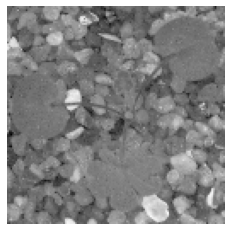

In [9]:
# verify if images was turned into grayscale

plt.imshow(X_train[1], cmap='Greys_r')
#plt.title(labels[1])
plt.axis('off')
plt.show()

In [10]:
# define y-train matrix to correctly identify each class
encoded_labels = pd.get_dummies(labels)
y_train = np.array(encoded_labels)


In [11]:
y_train.shape

(4750, 12)

In [12]:
# Normalize data for X_train array by dividing by 255, which is max value for a pixel.
IMG_SIZE =128
X_train_s = np.array(X_train)/255.0
X_train_s, X_test, y_train_s, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state = 1, stratify = y_train)
X_train_s = np.array(X_train_s).reshape(-1,IMG_SIZE,IMG_SIZE,1)
#X_test = X_test.reshape(-1,IMG_SIZE,IMG_SIZE,1)

### 6) EDA
- sum up each count of each class
- plot pie chart of ccount of each class
- plot mean of each class  

In [13]:
class_label = []
for label, content in encoded_labels.items():
  class_label.append(label)
  print(label)
  #class_label.append(feature.unique())


Label_Black-grass
Label_Charlock
Label_Cleavers
Label_Common Chickweed
Label_Common wheat
Label_Fat Hen
Label_Loose Silky-bent
Label_Maize
Label_Scentless Mayweed
Label_Shepherds Purse
Label_Small-flowered Cranesbill
Label_Sugar beet


In [14]:
class_label

['Label_Black-grass',
 'Label_Charlock',
 'Label_Cleavers',
 'Label_Common Chickweed',
 'Label_Common wheat',
 'Label_Fat Hen',
 'Label_Loose Silky-bent',
 'Label_Maize',
 'Label_Scentless Mayweed',
 'Label_Shepherds Purse',
 'Label_Small-flowered Cranesbill',
 'Label_Sugar beet']

In [15]:
list(labels.Label.unique())

['Small-flowered Cranesbill',
 'Fat Hen',
 'Shepherds Purse',
 'Common wheat',
 'Common Chickweed',
 'Charlock',
 'Cleavers',
 'Scentless Mayweed',
 'Sugar beet',
 'Maize',
 'Black-grass',
 'Loose Silky-bent']

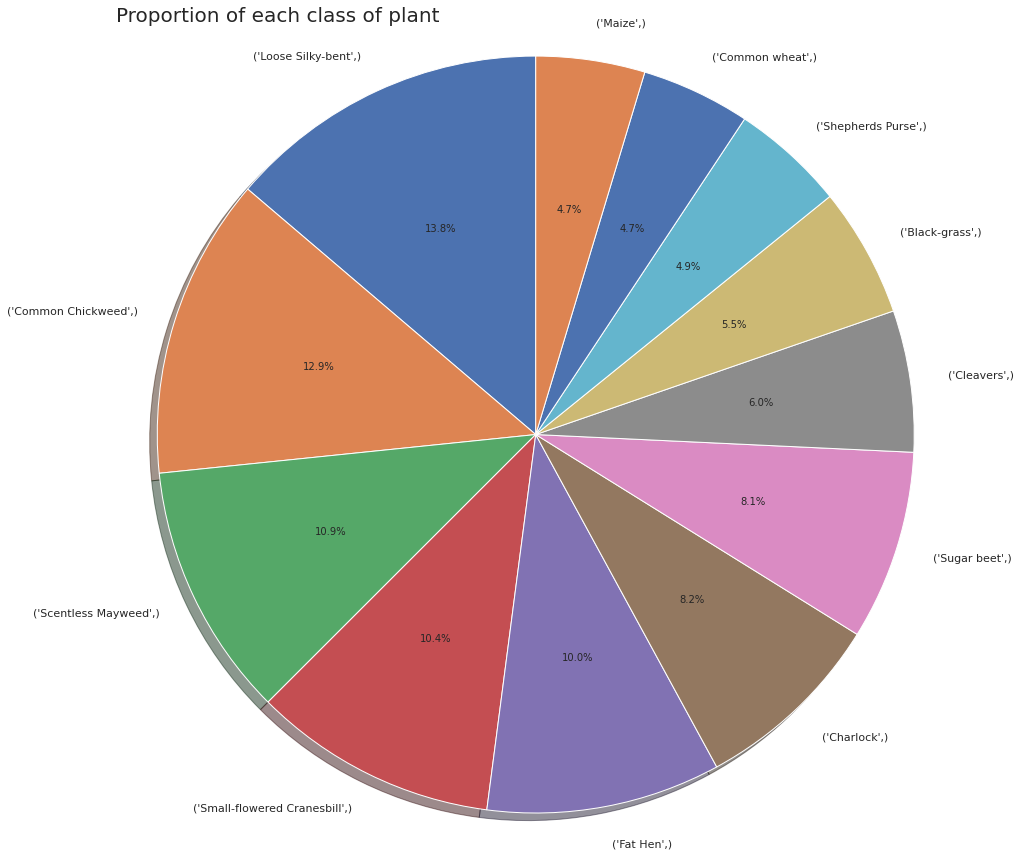

In [16]:
#plotting the pie chart 
 

plot_categories = []
for i in labels.value_counts().keys():
  plot_categories.append(i)
sizes = [labels.value_counts()]

explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(15, 15))
ax1.pie(sizes, explode=None, labels=plot_categories, autopct='%1.1f%%',
        shadow=True, startangle=90, rotatelabels = False)
ax1.axis('equal')
#fontdict = {'fontsize': rcParams['axes.titlesize'],
# 'fontweight' : rcParams['axes.titleweight'],
# 'color' : rcParams['axes.titlecolor'],
# 'verticalalignment': 'baseline',
# 'horizontalalignment': loc}
plt.title("Proportion of each class of plant", size = 20, loc = "left")
plt.show()

In [17]:
# plot mean image from each image classs

In [18]:
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape((128,128))
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

In [19]:
Small_flowered_Cranesbill = []
Fat_Hen = []
Shepherds_Purse = []
Common_wheat = []
Common_Chickweed = []
Charlock = []
Cleavers = []
Scentless_Mayweed = []
Sugar_beet = []
Maize = []
Black_grass = []
Loose_Silky_bent = []

plant_list = []

IMG_SIZE = 128
#new_array = cv2.resize(np.array(X_train),(IMG_SIZE,IMG_SIZE)) 
for cat in categories:  
  for img in X_train:
    new_array = np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1)
    #X_train_s = X_train_s.reshape(-1,128,128,1)
    if cat==categories[0]:
      Small_flowered_Cranesbill.append([new_array])
      
    if cat==categories[1]:
      Fat_Hen.append([new_array])
    if cat==categories[2]:
      Shepherds_Purse.append([new_array])
    if cat==categories[3]:
      Common_wheat.append([new_array])
    if cat==categories[4]:
      Common_Chickweed.append([new_array])
    if cat==categories[5]:
      Charlock.append([new_array])
    if cat==categories[6]:
      Cleavers.append([new_array])
    if cat==categories[7]:
      Scentless_Mayweed.append([new_array])
    if cat==categories[8]:
      Sugar_beet.append([new_array])
    if cat==categories[9]:
      Maize.append([new_array])
    if cat==categories[10]:
      Black_grass.append([new_array])
    if cat==categories[10]:
      Loose_Silky_bent.append([new_array])

plant_list = [Small_flowered_Cranesbill,
Fat_Hen,
Shepherds_Purse, 
Common_wheat, 
Common_Chickweed,
Charlock, 
Cleavers, 
Scentless_Mayweed,
Sugar_beet, 
Maize,
Black_grass, 
Loose_Silky_bent] 
    
    
    
               

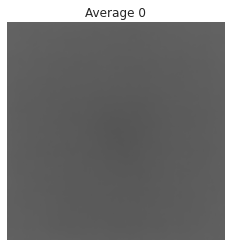

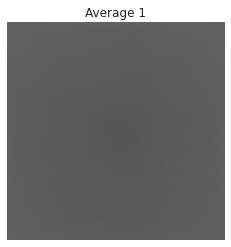

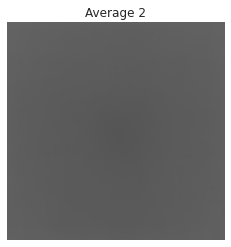

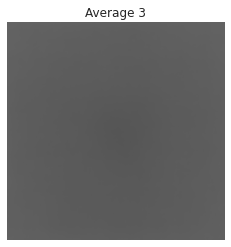

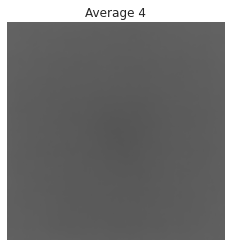

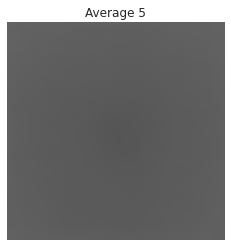

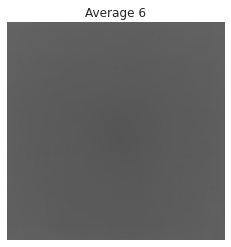

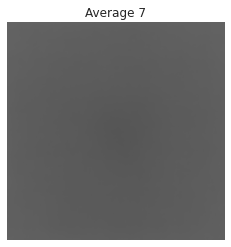

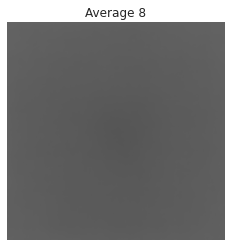

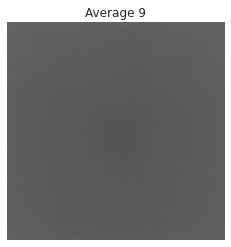

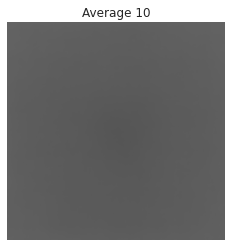

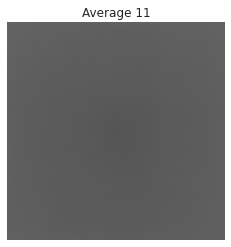

In [20]:
# iterate over each average image
for i,j in enumerate(plant_list):
  #for j in categories:
  find_mean_img(np.array(j),i)

### Using code from this source to process background of images 
### and plot them in subplot.
https://www.analyticsvidhya.com/blog/2021/05/plant-seedlings-classification-using-cnn-with-python-code/

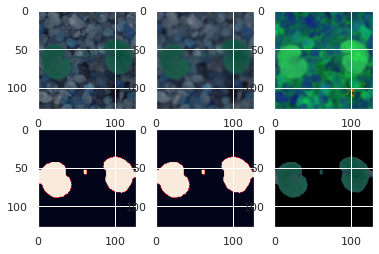

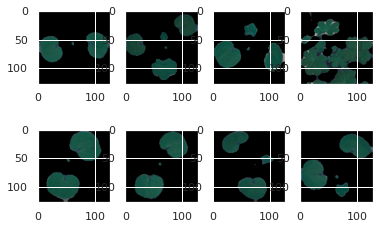

In [21]:

cleaned_img = []
sets = []; getEx = True
for i in images:
    blurr = cv2.GaussianBlur(i,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
    #GREEN PARAMETERS
    lower = (25,40,50)
    upper = (75,255,255)
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    cleaned_img.append(new)
    if getEx:
        plt.subplot(2,3,1);plt.imshow(i) # ORIGINAL
        plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
        plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
        plt.subplot(2,3,4);plt.imshow(mask) # MASKED
        plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
        plt.subplot(2,3,6);plt.imshow(new) # NEW PROCESSED IMAGE
        plt.show()
        getEx = False
cleaned_img = np.asarray(cleaned_img)
# CLEANED IMAGES
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(cleaned_img[i])

In [22]:
cleaned_img.shape

(4750, 128, 128, 3)

In [23]:
# define new x_train and y_train from background removed with grayscale

X_train_new = []
#X_train_new = cv2.cvtColor(cleaned_img, cv2.COLOR_BGR2GRAY)
for img in cleaned_img:
  #img_gray = cv2.cvtColor(cleaned_img[img], cv2.COLOR_BGR2GRAY)
  X_train_new.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

In [24]:
np.array(X_train_new).shape

(4750, 128, 128)

In [25]:
# Normalize data for X_train array by dividing by 255, which is max value for a pixel.
IMG_SIZE =128
X_train_new = np.array(X_train_new)
X_train_s, X_test, y_train_s, y_test = train_test_split(np.array(X_train_new), y_train, test_size=0.1, random_state = 1, stratify = y_train)
X_train_s = (X_train_s).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_train_s = (X_train_s)/255.0
#X_test = X_test.reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [26]:
np.array(X_train_s).shape

(4275, 128, 128, 1)

### 7) Build CNN model with sequential model




In [27]:
model = Sequential()
model.add(Conv2D(64, 3, activation="relu", padding="same", input_shape=(128,128,1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, 3, activation="relu", padding="same"))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation="softmax"))
optimizer = Adam()
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])
history = model.fit(np.array(X_train_s),np.array(y_train_s), validation_split=0.1, batch_size=256,epochs=30)
acc=model.evaluate(np.array(X_test),np.array(y_test))

Epoch 1/30
16/16 [==============================] - 13s 167ms/step - loss: 2.4811 - accuracy: 0.1352 - val_loss: 2.2667 - val_accuracy: 0.3551
Epoch 2/30
16/16 [==============================] - 2s 109ms/step - loss: 2.3176 - accuracy: 0.2116 - val_loss: 2.0158 - val_accuracy: 0.3949
Epoch 3/30
16/16 [==============================] - 2s 109ms/step - loss: 2.2158 - accuracy: 0.2508 - val_loss: 2.0003 - val_accuracy: 0.4206
Epoch 4/30
16/16 [==============================] - 2s 109ms/step - loss: 2.1336 - accuracy: 0.2807 - val_loss: 1.9476 - val_accuracy: 0.4509
Epoch 5/30
16/16 [==============================] - 2s 109ms/step - loss: 2.0577 - accuracy: 0.2992 - val_loss: 1.8170 - val_accuracy: 0.4276
Epoch 6/30
16/16 [==============================] - 2s 109ms/step - loss: 1.9594 - accuracy: 0.3202 - val_loss: 1.7663 - val_accuracy: 0.4696
Epoch 7/30
16/16 [==============================] - 2s 109ms/step - loss: 1.8888 - accuracy: 0.3353 - val_loss: 1.6962 - val_accuracy: 0.4720
Epoch

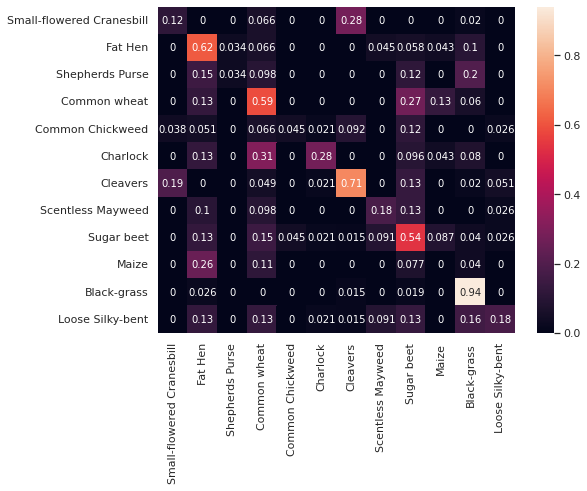

In [28]:
# Test Prediction 
# make predictions on model 
y_test_pred_1 = model.predict(np.array(X_test))
y_test_pred_classes_1 = np.argmax(y_test_pred_1, axis=1)
y_test_pred_prob_1 = np.argmax(y_test, axis=1)


# Test Accuracy 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
#accuracy_score((y_test), y_test_pred_classes_1)
cf_matrix = confusion_matrix(y_test_pred_prob_1, y_test_pred_classes_1)

# Confusion matrix normalized per category true value
cf_matrix = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, xticklabels=categories, yticklabels=categories, annot=True)

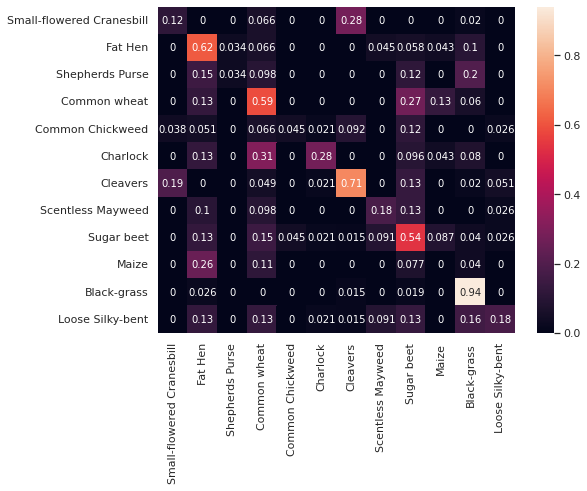

In [29]:
# Test Prediction 
# make predictions on model 
y_test_pred_2 = model.predict(np.array(X_test))
y_test_pred_classes_2 = np.argmax(y_test_pred_2, axis=1)
y_test_pred_prob_2 = np.argmax(y_test, axis=1)


# Test Accuracy 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
#accuracy_score((y_test), y_test_pred_classes_1)
cf_matrix = confusion_matrix(y_test_pred_prob_2, y_test_pred_classes_2)

# Confusion matrix normalized per category true value
cf_matrix = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, xticklabels=categories, yticklabels=categories, annot=True)

In [30]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 10ms/step - loss: 502.1244 - accuracy: 0.4421


[502.1243896484375, 0.4421052634716034]

Epoch 1/100
54/54 [==============================] - ETA: 0s - loss: 0.8963 - accuracy: 0.6792
Epoch 00001: val_accuracy improved from -inf to 0.70760, saving model to best_model.h5
54/54 [==============================] - 4s 65ms/step - loss: 0.8963 - accuracy: 0.6792 - val_loss: 1.0669 - val_accuracy: 0.7076
Epoch 2/100
53/54 [============================>.] - ETA: 0s - loss: 0.9664 - accuracy: 0.6725
Epoch 00002: val_accuracy did not improve from 0.70760
54/54 [==============================] - 2s 37ms/step - loss: 0.9687 - accuracy: 0.6711 - val_loss: 1.0893 - val_accuracy: 0.6971
Epoch 3/100
53/54 [============================>.] - ETA: 0s - loss: 0.9510 - accuracy: 0.6825
Epoch 00003: val_accuracy did not improve from 0.70760
54/54 [==============================] - 2s 37ms/step - loss: 0.9506 - accuracy: 0.6819 - val_loss: 1.0863 - val_accuracy: 0.6959
Epoch 4/100
53/54 [============================>.] - ETA: 0s - loss: 0.8846 - accuracy: 0.7019
Epoch 00004: val_accuracy did not

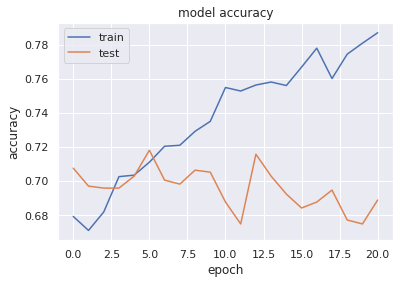

In [31]:
#### Implement second version CNN with call back and model checkpoint
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model.fit(X_train_s, 
          y_train_s,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=100, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Epoch 1/30
54/54 [==============================] - ETA: 0s - loss: 2.3745 - accuracy: 0.1950
Epoch 00001: val_accuracy improved from -inf to 0.21988, saving model to best_model.h5
54/54 [==============================] - 4s 60ms/step - loss: 2.3745 - accuracy: 0.1950 - val_loss: 2.4554 - val_accuracy: 0.2199
Epoch 2/30
53/54 [============================>.] - ETA: 0s - loss: 1.8133 - accuracy: 0.3614
Epoch 00002: val_accuracy did not improve from 0.21988
54/54 [==============================] - 3s 48ms/step - loss: 1.8136 - accuracy: 0.3614 - val_loss: 2.4318 - val_accuracy: 0.2035
Epoch 3/30
54/54 [==============================] - ETA: 0s - loss: 1.6486 - accuracy: 0.4199
Epoch 00003: val_accuracy improved from 0.21988 to 0.27368, saving model to best_model.h5
54/54 [==============================] - 3s 51ms/step - loss: 1.6486 - accuracy: 0.4199 - val_loss: 2.3832 - val_accuracy: 0.2737
Epoch 4/30
53/54 [============================>.] - ETA: 0s - loss: 1.5748 - accuracy: 0.4396
Ep

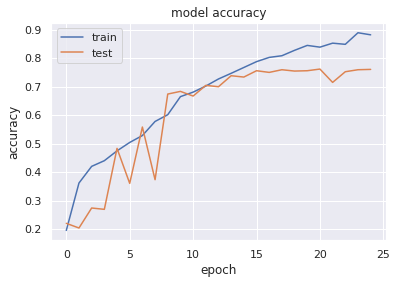

In [32]:
#### Implement second version CNN with call back and model checkpoint
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential()
#
y_train=np.array(y_train)
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64



es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history=model.fit((X_train_s), 
          (y_train_s),  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Run model with colored images and check output

In [33]:
model.evaluate(X_test,y_test)

15/15 [==============================] - 0s 15ms/step - loss: 2069.3933 - accuracy: 0.1832


[2069.393310546875, 0.18315789103507996]

In [34]:
# run model with colored images instead of gray_scale 
X_train_color = cleaned_img


Epoch 1/100
134/133 [==============================] - ETA: 0s - loss: 2.0405 - accuracy: 0.3523
Epoch 00001: val_accuracy did not improve from 0.76140
133/133 [==============================] - 10s 67ms/step - loss: 2.0405 - accuracy: 0.3523 - val_loss: 2.0729 - val_accuracy: 0.2620
Epoch 2/100
134/133 [==============================] - ETA: 0s - loss: 1.5414 - accuracy: 0.4603
Epoch 00002: val_accuracy did not improve from 0.76140
133/133 [==============================] - 9s 67ms/step - loss: 1.5414 - accuracy: 0.4603 - val_loss: 1.3348 - val_accuracy: 0.5123
Epoch 3/100
133/133 [============================>.] - ETA: 0s - loss: 1.4264 - accuracy: 0.4925
Epoch 00003: val_accuracy did not improve from 0.76140
133/133 [==============================] - 10s 73ms/step - loss: 1.4247 - accuracy: 0.4930 - val_loss: 1.3903 - val_accuracy: 0.5310
Epoch 4/100
133/133 [============================>.] - ETA: 0s - loss: 1.3355 - accuracy: 0.5231
Epoch 00004: val_accuracy did not improve from 0.

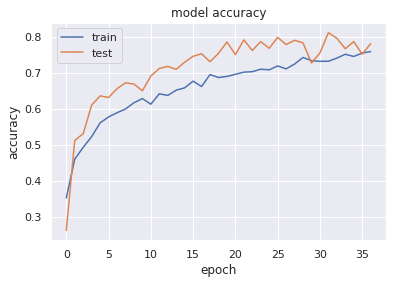

In [35]:
# Use image generator along with CNN 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train_s)
# fits the model on batches with real-time data augmentation:
history = model.fit(datagen.flow(X_train_s, y_train_s, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(X_train_s, y_train_s,
         batch_size=8, subset='validation'),
         steps_per_epoch=len(X_train_s) / 32, epochs = 100,
         callbacks = [es, mc], use_multiprocessing = True)
# here's a more "manual" example
#for e in range(100):
#    print('Epoch', e)
#    batches = 0
#    for x_batch, y_batch in datagen.flow(X_train_s, y_train_s, batch_size=32):
#        model.fit(x_batch, y_batch)
#        batches += 1
#        if batches >= len(X_train_s) / 32:
            # we need to break the loop by hand because
            # the generator loops indefinitely
#            break
#history=model.fit((X_train_s), 
#          (y_train_s),  #It expects integers because of the sparse_categorical_crossentropy loss function
#          epochs=30, #number of iterations over the entire dataset to train on
#          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
# run model with color images instead of grayscale
# Normalize data for X_train array by dividing by 255, which is max value for a pixel.
IMG_SIZE =128
X_train_color = cleaned_img
X_train_s_color, X_test, y_train_s, y_test = train_test_split(X_train_color, y_train, test_size=0.1, random_state = 1, stratify = y_train)
X_train_s_color = (X_train_s_color).reshape(-1,IMG_SIZE,IMG_SIZE,3)
X_train_s_color = (X_train_s_color)/255.0
#X_test = X_test.reshape(-1,IMG_SIZE,IMG_SIZE,1)

### Use colored x_train array to fit with model

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential()
#

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64



es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history=model.fit((X_train_s_color), 
          (y_train_s),  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/30
53/54 [============================>.] - ETA: 0s - loss: 3.7509 - accuracy: 0.1135
Epoch 00001: val_accuracy improved from -inf to 0.11111, saving model to best_model.h5
54/54 [==============================] - 5s 65ms/step - loss: 3.7396 - accuracy: 0.1146 - val_loss: 2.4794 - val_accuracy: 0.1111
Epoch 2/30
54/54 [==============================] - ETA: 0s - loss: 2.3318 - accuracy: 0.2105
Epoch 00002: val_accuracy did not improve from 0.11111
54/54 [==============================] - 3s 53ms/step - loss: 2.3318 - accuracy: 0.2105 - val_loss: 2.4704 - val_accuracy: 0.1018
Epoch 3/30
54/54 [==============================] - ETA: 0s - loss: 2.0828 - accuracy: 0.2909
Epoch 00003: val_accuracy did not improve from 0.11111
54/54 [==============================] - 3s 53ms/step - loss: 2.0828 - accuracy: 0.2909 - val_loss: 2.4541 - val_accuracy: 0.1018
Epoch 4/30
53/54 [============================>.] - ETA: 0s - loss: 1.8956 - accuracy: 0.3426
Epoch 00004: val_accuracy did not imp

In [ ]:
### add gaussian blurring to images and check for model improvement

from scipy.ndimage.filters import gaussian_filter

#blurred = gaussian_filter(image_data_gray[0],  sigma=0.7)
#blurred_img = []
#IMG_SIZE = 128
X_train_gauss = gaussian_filter(np.array(X_train),sigma = .7)
#new_array = cv2.resize(np.array(X_train),(IMG_SIZE,IMG_SIZE)) 
#for cat in categories:  
#  for img in X_train:
#    new_array = gaussian_filter(np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1),sigma=.7)
#    blurred_img.append([new_array])

In [ ]:
X_train_gauss.shape

In [ ]:
# verify if images was turned into grayscale and blurred

plt.imshow(X_train_gauss[3], cmap='Greys_r')
#plt.title(labels[1])
plt.axis('off')
plt.show()

In [ ]:
# split data for the 2nd time with blurred array



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train_gauss)
# fits the model on batches with real-time data augmentation:
model.fit(datagen.flow(X_train_gauss, y_train, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(X_train_gauss, y_train,
         batch_size=8, subset='validation'),
         steps_per_epoch=len(X_train) / 32, epochs = 100,
         callbacks = [es, mc], use_multiprocessing = True)

In [ ]:
type(X_test)

In [ ]:
# Test Prediction 
y_test_pred_ln3 = model.predict(X_test)
y_test_pred_classes_ln3 = np.argmax(y_test_pred_ln3, axis=1)
y_test_pred_prob_ln3 = np.max(y_test_pred_ln3, axis=1)
cf_matrix = confusion_matrix(np.array(y_test), y_test_pred_classes_ln3)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

### Shape of the data
- The data has 10k rows and 14 columns

In [ ]:
data.info()

In [ ]:
images.shape

In [ ]:
data.describe().T

### Insights 

- Balance has a slight disparity from mean and median values
- HAsCrCard has a slight disparity from the mean and median values

In [ ]:
# check for sum of null values

data.isna().sum()

In [ ]:
# define cat_ cols and numerical columns for EDA 


In [ ]:
# drop the  Sl_no and customer key column as this will add no value to the cluster analysis
#data = data.drop(["Sl_No","Customer Key"], axis = 1)
#data.describe()

In [ ]:
# insights for the descriptive stats: Avg Credit card and total visits online appear to have outliers
#  - This is due to the fact that the median and mean values are quite different. In credit limit there's 
# a diff. of approx 18,000 and with total visits_online there is a smaller differnece.  

In [ ]:
# check for class imbalances 

data["Exited"].value_counts()

### 5) - Bivariate Analyis
- pairplot
- correlation

In [ ]:
sns.pairplot(data,diag_kind = 'kde', hue = "Exited")

In [ ]:
# correlation for continous variables
cat_list = ["NumOfProducts","HasCrCard","IsActiveMember","Tenure"]
num_col = data.columns.drop(cat_list)
num_col

In [ ]:
def make_corr_matrix(corr_matrix):

    fig, ax = plt.subplots(figsize= (15,10))
    ax = sns.heatmap(corr_matrix, 
                    annot = True,
                    linewidths=0.5,
                    fmt= ".2f",
                    cmap= "YlGnBu");
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + .5, top - 0.5)
    plt.show()

In [ ]:
tmp_data= data.copy()
numeric_col =[  'CreditScore', 
        'Age', 'Balance', 'EstimatedSalary']

In [ ]:
corr_df = pd.DataFrame(data= tmp_data,index=tmp_data.index, columns =numeric_col)
corr_df = corr_df.corr()

In [ ]:
make_corr_matrix(corr_df)

In [ ]:
# let's check the categorical columns 

cat_corr_df = pd.DataFrame(data= tmp_data,index=tmp_data.index, columns =["Geogrpahy","Gender","Tenure","NumOfProducts","HasCrCard"
,"IsActiveMember"])
cat_corr_df = cat_corr_df.corr()
make_corr_matrix(cat_corr_df)

In [ ]:
tmp_data.columns

In [ ]:
# load bivariate functions

# edafunctions
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """


    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram




In [ ]:
def distribution_plot_wrt_target(data, predictor, target):
    
    """
    box plot and histogram combined

    data: dataframe
    feature: dataframe column
    target: target classification colummn
  
    """
    
    
    import warnings
    warnings.filterwarnings("ignore")
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(color_codes=True)  


    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="Blues")

    axs[1, 1].set_title("Boxplot (with flier removed) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="Blues",
    )

    plt.tight_layout()
    plt.show()
# define column list of tmp_data 

In [ ]:
num_col

In [ ]:
numeric_col =[  'CreditScore', 
        'Age', 'Balance', 'EstimatedSalary']

In [ ]:


for col in numeric_col:
  distribution_plot_wrt_target(tmp_data,col,"Exited")
       
        

In [ ]:
for col in numeric_col:
  histogram_boxplot(tmp_data, col)

### Insights on pairplot.
- 

- looking at the pairplot it is easily determined that none of these variables correlate with one another. They are all independent of each other. 


### Insights for EDA
- Approx 96% of customers have 1-2 products from the bank
- 70% of the customers have a card from the bank
- The banks lowest customer group are the tenured of 10 years
- Credit score looks normally distributed
- The age is slightly skewed to the left for customers that have left the bank
- The estimated salary appears to be a uniform distribution(same prob for any salary)
- There are wuite a few customers that have a 0 balance and this doesnt depend on if the custoemr has left the bank or not. 
- no correlation with categorical values and numerical values

In [ ]:
# make copies of original dataset to remove and not remove outliers

out_data = data.copy()
tmp_data = data.copy()

In [ ]:
# identify outliers 
# use IQR to identify outliers. calculate 1st and 2nd quartile, then identify data points that are outside
# of the 4 * IQR range
balance_quartiles =np.quantile(out_data['Balance'][out_data['Balance'].notnull()], [.25, .75])
balance_quartiles_iqr = 4 * (balance_quartiles[1] - balance_quartiles[0])
Products_quartiles =np.quantile(out_data['NumOfProducts'][out_data['NumOfProducts'].notnull()], [.25, .75])
Products_quartiles_iqr = 4 * (Products_quartiles[1] - Products_quartiles[0])
# define the outlier

balance_outlier = out_data.loc[np.abs(out_data["Balance"]-out_data["Balance"].median()) > balance_quartiles_iqr, "Balance"]
product_outlier = out_data.loc[np.abs(out_data["NumOfProducts"]-out_data["NumOfProducts"].median()) > Products_quartiles_iqr, "NumOfProducts"]
len(balance_outlier)+len(product_outlier)


### outlier treatment 
- There are no outliers in this dataset

In [ ]:
tmp_data.shape

In [ ]:
#cat_list = list(tmp_data.columns)
#cat_list.remove("Avg_Credit_Limit")

In [ ]:
for col in cat_list:
    
    print(100*(data[col].isnull().sum()/len(data[col])))
    print(data[col].name)
    print("-"*60)

In [ ]:
cat_list = ["NumOfProducts","HasCrCard","IsActiveMember","Tenure"]

In [ ]:
# Preprocessing data 
# - Remove duplicate values

print("Before dropping of duplciates, data is",tmp_data.shape[0],"rows")
tmp_data.drop_duplicates(inplace=True)
print("after dropping of duplciates, data is",tmp_data.shape[0],"rows")

In [ ]:
data.duplicated().sum()

In [ ]:
# get rid of useless rows which are 'RowNumber', 'CustomerId', 'Surname'

In [ ]:
tmp_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)


In [ ]:
tmp_data.head(5)

In [ ]:
data["Gender"].value_counts()

In [ ]:
data["Exited"].value_counts()

In [ ]:
# insights there is a class imbalance so weights will need to be applied to the model to account for the class imbalance

In [ ]:
data["Geography"].value_counts(0)

In [ ]:
data_copy = data.copy()

In [ ]:
data_copy.drop(columns = ["RowNumber","CustomerId", "Surname"], axis = 1, inplace = True)
data_copy.head()

In [ ]:
### 3) Univariate analysis

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    import warnings
    warnings.filterwarnings("ignore")
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(color_codes=True)  


    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="PuBu",
        order=data[feature].value_counts(ascending=True).index[:n],
        hue = None
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
for feature in cat_list:
  if feature == "Total_visits_bank":
    print("#"*50)
    print("1 and 2 visits attribute to the most of the bank visits")
    print("#"*50)
  elif feature == "Total_Credit_Cards":
    print("#"*50)
    print("Customers with the 4,6,7 atttribute to the majority of the total credit cards", 
    "within the customers")
    print("#"*50)
  elif feature == "Total_visits_online":
    print("#"*50)
    print("0-2 visits online attribute to the majority of the online traffic", 
    "The customers don't really like going on the web")
    print("#"*50)
  elif feature == "Total_calls_made":
    print("#"*50)
    print("approx 70% of the customers fall within 0-4 calls made")
    print("#"*50)
  labeled_barplot(tmp_data, feature, perc=True)
  


In [ ]:
### Define function for stacked barplots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    
    )
    
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"NumOfProducts")

In [ ]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"HasCrCard")

In [ ]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"IsActiveMember")

In [ ]:
for feature in cat_list:
  stacked_barplot(tmp_data, feature,"Tenure")

In [ ]:
# Encode categorical variaBLES WITH  get dummies


#tmp_data = pd.get_dummies(tmp_data,drop_first=True)
data_copy = data_copy # wdataset needs to be float to convert to tensors later
data_copy.head(5)

In [ ]:
data.head()

In [ ]:
data1 = data.copy()





### 7) Build ANN mode for classification

- Define feature matrices x and y 
- Define train, test and val 
- scale data using scaler to standardize all data 
- Convert data into numpy vectors using .reshape
- Instantiate model
- Add input layer
- add hidden layers 
- add output layers

In [ ]:
data.head()

In [ ]:
data.dtypes

In [ ]:
data.info()

In [ ]:
copy_df = data.copy()

In [ ]:
data1 = pd.DataFrame(data = copy_df, columns= data.columns, index = data.index)
data1.head()

In [ ]:
# make copy of data
df_copy= data.copy()
# drop unneeded columns
df_copy.drop(columns=["RowNumber","CustomerId","Surname"], axis =1, inplace = True)
df_copy = pd.get_dummies(df_copy)

In [ ]:
df_copy.head(5)

In [ ]:
# define feature matrices X and y 

X = df_copy.drop(columns="Exited")
Y = df_copy['Exited']

# splitting the data into train, test and val

#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
#Splitting the train set into  dev set and training set
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

In [ ]:
# scale the data using standard scaler

from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()

# use fit transform on X_train, Xtrain learns from fit_transform, x_test is used on 
# .transform function

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# convert x_train and x_test to tensor obejct

X_train_tens = tf.convert_to_tensor(X_train_scaled)
X_test_tens = tf.convert_to_tensor(X_test_scaled)

# convert y_train and y_test to tensor object

y_train_tens = tf.convert_to_tensor(y_train)
y_test_tens = tf.convert_to_tensor(y_test)


In [ ]:
len(X_train_scaled)

In [ ]:
# convert data into tensors

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam # Optimizer

## define function to make confusion matrix
- import libraries 
- make confusion matrix function


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=X_train_tens.shape[1]))

model.add(Dense(13, activation = 'relu'))
# model.add(Dropout(0.3))
model.add(Dense(20, activation = 'relu'))
# model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(20, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation = 'relu'))
# model.add(Dropout(0.5)) 
# model.add(Dense(5, activation = 'relu'))

# model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(14, kernel_initializer='he_normal', activation = 'relu'))

#model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = "binary_crossentropy", metrics=['accuracy'])

history = model.fit(X_train_tens, y_train_tens, validation_split=0.3, batch_size=128, epochs=500, verbose=1)

# graph learning rate vs epochs 

# Storing the learing rate in each epoch 
epochhist  = pd.DataFrame(history.history)
epochhist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(15, 10))
plt.plot(epochhist['loss']);
plt.plot(epochhist['val_loss']);
plt.legend(("train" , "valid") , loc = 0);


In [ ]:
# make function to plot roc curve and obtain AUC

!pip install plot-metric


In [ ]:
  from plot_metric.functions import BinaryClassification
  def graph_roc_curve(model,X_train, y_train):
    y_pred = model.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)

    max_idx = np.argmax(tpr-fpr)
    optimal_threshold = thresholds[max_idx]
   
    binClassifier = BinaryClassification(y_train,y_pred, labels = ["Class 1", "Class 2"], threshold=optimal_threshold)
# figures
    plt.figure(figsize=(10,10))
    binClassifier.plot_roc_curve()
    plt.show()


In [ ]:
graph_roc_curve(model,X_train_tens,y_train_tens)

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model.predict(X_test_tens)
for i in range(len(y_test_tens)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test_tens, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
# Adding the threshold value to the confusion matrix to properly account for class imablances
y_pred = model.predict(X_test_tens)
fpr, tpr, thresholds = roc_curve(y_test_tens, y_pred)

max_idx = np.argmax(tpr - fpr) # returns max index of all [tpr-fpr] from the tpr and fpr arrays
optimimized_threshold = thresholds[max_idx]



threshold=optimimized_threshold
y_pred = (model.predict(X_test_tens) > threshold).astype('float')
cm2=confusion_matrix(y_test_tens, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, group_names=labels,categories=categories, cmap='Blues')

### insights with above model, overfitting the data as the valid and training loss are divergent and not converging. This model is overfitting very severely



In [ ]:
# modify parameters of neural network to see if accuracy can increase

# add more hidden layers


model2 = tf.keras.Sequential()
model2.add(InputLayer(input_shape=X_train_tens.shape[1]))

model2.add(Dense(13, kernel_initializer='he_normal', activation = 'relu'))
model.add(Dropout(.3))
model2.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dense(10, activation = 'relu'))
model2.add(Dropout(0.5)) 
model2.add(Dense(20,kernel_initializer='he_normal', activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(20, activation = 'relu'))
# model.add(Dropout(0.5)) 
# model.add(Dense(5, activation = 'relu'))
#model.add(Dropout(0.5))
#model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(14, kernel_initializer='he_normal', activation = 'relu'))

#model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

model2.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model2.compile(optimizer=Adam(lr=0.00001), loss = "binary_crossentropy", metrics=['accuracy'])

history = model2.fit(X_train_tens, y_train_tens, validation_split=0.3, batch_size=64, epochs=300, verbose=1)

# Storing the learing rate in each epoch 
epochhist  = pd.DataFrame(history.history)
epochhist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(15, 10))
plt.plot(epochhist['loss']);
plt.plot(epochhist['val_loss']);
plt.legend(("train" , "valid") , loc = 0);


In [ ]:
graph_roc_curve(model2,X_train_tens, y_train_tens)

In [ ]:
# Adding the threshold value to the confusion matrix to properly account for class imablances
y_pred = model2.predict(X_test_tens)
fpr, tpr, thresholds = roc_curve(y_test_tens, y_pred)

max_idx = np.argmax(tpr - fpr) # returns max index of all [tpr-fpr] from the tpr and fpr arrays
optimimized_threshold = thresholds[max_idx]



threshold=optimimized_threshold
y_pred = (model2.predict(X_test_tens) > threshold).astype('float')
cm2=confusion_matrix(y_test_tens, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, group_names=labels,categories=categories, cmap='Blues')

### insights 
- At around 250 Epochs the valid loss starts to increase the model is being overfit again.
- Next model, try lowering the learning rate and increasing batch size, run 250 epochs

In [ ]:
model3 = tf.keras.Sequential()
model3.add(InputLayer(input_shape=X_train_tens.shape[1]))

model3.add(Dense(13, kernel_initializer='he_normal', activation = 'relu'))
model3.add(Dropout(.3))
model3.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dense(10, activation = 'relu'))
model3.add(Dropout(0.5)) 
model3.add(Dense(20,kernel_initializer='he_normal', activation = 'relu'))
#model3.add(Dropout(0.5))
#model3.add(Dense(20, activation = 'relu'))
# model.add(Dropout(0.5)) 
# model.add(Dense(5, activation = 'relu'))
#model.add(Dropout(0.5))
#model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(14, kernel_initializer='he_normal', activation = 'relu'))

#model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

model3.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

model3.compile(optimizer=Adam(lr=0.000005), loss = "binary_crossentropy", metrics=['accuracy'])

history = model3.fit(X_train_tens, y_train_tens, validation_split=0.3, batch_size=256, epochs=500, verbose=1)


# Storing the learing rate in each epoch 
epochhist  = pd.DataFrame(history.history)
epochhist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(15, 10))
plt.plot(epochhist['loss']);
plt.plot(epochhist['val_loss']);
plt.legend(("train" , "valid") , loc = 0);

In [ ]:
graph_roc_curve(model3,X_train_tens,y_train_tens)

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model3.predict(X_test_tens)
for i in range(len(y_test_tens)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test_tens, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
# Adding the threshold value to the confusion matrix to properly account for class imablances
y_pred = model3.predict(X_test_tens)
fpr, tpr, thresholds = roc_curve(y_test_tens, y_pred)

max_idx = np.argmax(tpr - fpr) # returns max index of all [tpr-fpr] from the tpr and fpr arrays
optimimized_threshold = thresholds[max_idx]



threshold=optimimized_threshold
y_pred = (model3.predict(X_test_tens) > threshold).astype('float')
cm2=confusion_matrix(y_test_tens, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, group_names=labels,categories=categories, cmap='Blues')

In [ ]:
# import keras to use SGD 
from tensorflow import keras

*italicized text*

In [ ]:
model4 = tf.keras.Sequential()
model4.add(InputLayer(input_shape=X_train_tens.shape[1]))

model4.add(Dense(13, kernel_initializer='he_normal', activation = 'relu'))
model4.add(Dropout(.3))
model4.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dense(10, activation = 'relu'))
model4.add(Dropout(0.5)) 
model4.add(Dense(20,kernel_initializer='he_normal', activation = 'relu'))
#model3.add(Dropout(0.5))
#model3.add(Dense(20, activation = 'relu'))
# model.add(Dropout(0.5)) 
# model.add(Dense(5, activation = 'relu'))
#model.add(Dropout(0.5))
#model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(14, kernel_initializer='he_normal', activation = 'relu'))

#model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

model4.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
opt = keras.optimizers.SGD(learning_rate=0.000015,nesterov=True, momentum=.5, decay = .01)
model4.compile(optimizer=opt, loss = "binary_crossentropy", metrics=['accuracy'])

history = model3.fit(X_train_tens, y_train_tens, validation_split=0.3, batch_size=256, epochs=128, verbose=1)


# Storing the learing rate in each epoch 
epochhist  = pd.DataFrame(history.history)
epochhist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(15, 10))
plt.plot(epochhist['loss']);
plt.plot(epochhist['val_loss']);
plt.legend(("train" , "valid") , loc = 0);

In [ ]:
graph_roc_curve(model4, X_train_tens, y_train_tens)

In [ ]:
## Confusion Matrix on unsee test set
y_pred1 = model4.predict(X_test_tens)
for i in range(len(y_test_tens)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test_tens, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
# Adding the threshold value to the confusion matrix to properly account for class imablances
y_pred = model4.predict(X_test_tens)
fpr, tpr, thresholds = roc_curve(y_test_tens, y_pred)

max_idx = np.argmax(tpr - fpr) # returns max index of all [tpr-fpr] from the tpr and fpr arrays
optimimized_threshold = thresholds[max_idx]



threshold=optimimized_threshold
y_pred = (model4.predict(X_test_tens) > threshold).astype('float')
cm2=confusion_matrix(y_test_tens, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, group_names=labels,categories=categories, cmap='Blues')

### Hypertune neural network
-use gridsearchcv method to hypertune 


In [ ]:
total_0 = y_train.value_counts()[0]
total_1 = y_train.value_counts()[1]
total= total_0+total_1

# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / total_0) * (total / 2.0)
weight_for_1 = (1 / total_1) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

In [ ]:
# first before hypertuning 
# add class weight to 1 st model and rerun and see results 
# add early stopping to model to prevent model from running if no improvement is gained 


#Training Multi-layer perceptron with 2 hidden layers

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
"""
monitor: Quantity to be monitored.
min_delta: Minimum change in the monitored quantity to qualify as an improvement, 
i.e. an absolute change of less than min_delta, will count as no improvement.

patience: Number of epochs with no improvement after which training will be stopped.
mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped 
decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the 
direction is automatically inferred from the name of the monitored quantity.
restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. 
If False, the model weights obtained at the last step of training are used.
"""



model5 = tf.keras.Sequential()
model5.add(InputLayer(input_shape=X_train_tens.shape[1]))

model5.add(Dense(13, activation = 'relu'))
# model.add(Dropout(0.3))
model5.add(Dense(20, activation = 'relu'))
# model.add(Dense(10, activation = 'relu'))
model5.add(Dropout(0.5)) 
model5.add(Dense(20, activation = 'relu'))
model5.add(Dropout(0.5))
model5.add(Dense(14, activation = 'relu'))
# model.add(Dropout(0.5)) 
# model.add(Dense(5, activation = 'relu'))

# model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dense(20, kernel_initializer='he_normal', activation = 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(14, kernel_initializer='he_normal', activation = 'relu'))

#model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

model5.add(Dense(1, activation='sigmoid'))

model5.compile(optimizer=Adam(lr=0.00005,beta_1=.95), loss = "binary_crossentropy", metrics=['accuracy'])

history = model5.fit(X_train_tens, y_train_tens, validation_split=0.3, batch_size=128, epochs=700, verbose=1, class_weight=class_weight, callbacks=[es])

# graph learning rate vs epochs 

# Storing the learing rate in each epoch 
epochhist  = pd.DataFrame(history.history)
epochhist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(15, 10))
plt.plot(epochhist['loss']);
plt.plot(epochhist['val_loss']);
plt.legend(("train" , "valid") , loc = 0);



In [ ]:
graph_roc_curve(model5,X_train_tens,y_train_tens)

In [ ]:
# Adding the threshold value to the confusion matrix to properly account for class imablances
y_pred = model5.predict(X_test_tens)
fpr, tpr, thresholds = roc_curve(y_test_tens, y_pred)

max_idx = np.argmax(tpr - fpr) # returns max index of all [tpr-fpr] from the tpr and fpr arrays
optimimized_threshold = thresholds[max_idx]



threshold=optimimized_threshold
y_pred = (model5.predict(X_test_tens) > threshold).astype('float')
cm2=confusion_matrix(y_test_tens, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, group_names=labels,categories=categories, cmap='Blues')

In [ ]:
#To hypertune parameters use keras classifier and build instance
# of model
# use classifier to pass it build model as an argument of the function
# with the classifier we can pass the whole model as an esitmator parameter in gridsearch cv

from tensorflow import keras # importing keras library
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
def build_model(optimizer):
    model = tf.keras.Sequential()
    model.add(InputLayer(input_shape=X_train_tens.shape[1]))

    model.add(Dense(13, kernel_initializer= 'he_normal', activation = 'relu'))

    model.add(Dense(20, kernel_initializer= 'he_normal', activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20, kernel_initializer= 'he_normal', activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(14, kernel_initializer= 'he_normal', activation = 'relu'))

    model.add(Dense(1, kernel_initializer= 'he_normal', activation='sigmoid'))

    model.compile(optimizer=optimizer, loss = "binary_crossentropy", metrics=['accuracy'])
    #X_train_tens, y_train_tens, validation_split=0.3, batch_size=128, epochs=700, verbose=1, class_weight=class_weight, callbacks=[es])

    return model

model = KerasClassifier(build_fn = build_model)
parameters = {'batch_size': [32,64,128,256],
              'epochs': [50,100],
              'optimizer': ['adam', 'rmsprop']}

     
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5)

grid_search = grid_search.fit(X_train_scaled, y_train,verbose = 1,class_weight=class_weight, validation_split = 0.3, callbacks = [es])
#grid_search = grid_search.fit(X_train_scaled, y_train_tens,verbose = 1)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [ ]:
print(best_accuracy)
print(best_parameters)

### insights about neural networks and model building 

- model 1 gave the best results
- this was the base model for hypertuning
- This model had the highest AUC @ .85
  - meaning this model had the highest probablity of having true positives occur.

### The metric that was choosen is recall, we want to maximize true positives(customers churning actually) and minimize false negatives(predicting customers leaving bank but they didnt) 

### Take model parameters from best_params and build model, change learning rate and build other models

### USE opitmal threshold and use that to calculate model predictions in the confusion matrix

In [ ]:
# build model with hypertuned parameter LR = .001
model6 = tf.keras.Sequential()
model6.add(InputLayer(input_shape=X_train_tens.shape[1]))



model6.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))

model6.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))
model6.add(Dropout(0.5))
model6.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))
model6.add(Dropout(0.5))
model6.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))

model6.add(Dense(1, kernel_initializer= 'he_normal', activation='sigmoid'))
model6.compile(optimizer=Adam(lr=0.001,beta_1=.95), loss = "binary_crossentropy", metrics=['accuracy'])

history = model6.fit(X_train_tens, y_train_tens, validation_split=0.3, batch_size=132, epochs=100, verbose=1, class_weight=class_weight, callbacks=[es])


In [ ]:
graph_roc_curve(model6,X_train_tens,y_train_tens)

In [ ]:
# Adding the threshold value to the confusion matrix to properly account for class imablances
y_pred = model6.predict(X_test_tens)
fpr, tpr, thresholds = roc_curve(y_test_tens, y_pred)

max_idx = np.argmax(tpr - fpr) # returns max index of all [tpr-fpr] from the tpr and fpr arrays
optimimized_threshold = thresholds[max_idx]



threshold=optimimized_threshold
y_pred = (model6.predict(X_test_tens) > threshold).astype('float')
cm2=confusion_matrix(y_test_tens, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, group_names=labels,categories=categories, cmap='Blues')

In [ ]:
# build model with .0001 learning rate
model7 = tf.keras.Sequential()
model7.add(InputLayer(input_shape=X_train_tens.shape[1]))



model7.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))

model7.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))
model7.add(Dropout(0.5))
model7.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))
model7.add(Dropout(0.5))
model7.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))

model7.add(Dense(1, kernel_initializer= 'he_normal', activation='sigmoid'))
model7.compile(optimizer=Adam(lr=0.0001,beta_1=.95), loss = "binary_crossentropy", metrics=['accuracy'])

history = model7.fit(X_train_tens, y_train_tens, validation_split=0.3, batch_size=32, epochs=100, verbose=1, class_weight=class_weight, callbacks=[es])
# Storing the learing rate in each epoch 
epochhist  = pd.DataFrame(history.history)
epochhist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(15, 10))
plt.plot(epochhist['loss']);
plt.plot(epochhist['val_loss']);
plt.legend(("train" , "valid") , loc = 0);

In [ ]:
graph_roc_curve(model7,X_train_tens,y_train_tens)

In [ ]:
# Adding the threshold value to the confusion matrix to properly account for class imablances
y_pred = model7.predict(X_test_tens)
fpr, tpr, thresholds = roc_curve(y_test_tens, y_pred)

max_idx = np.argmax(tpr - fpr) # returns max index of all [tpr-fpr] from the tpr and fpr arrays
optimimized_threshold = thresholds[max_idx]



threshold=optimimized_threshold
y_pred = (model7.predict(X_test_tens) > threshold).astype('float')
cm2=confusion_matrix(y_test_tens, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, group_names=labels,categories=categories, cmap='Blues')

In [ ]:
# build model with .00001 learning rate 

# build model with .0001 learning rate
model8 = tf.keras.Sequential()
model8.add(InputLayer(input_shape=X_train_tens.shape[1]))



model8.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))

model8.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))
model8.add(Dropout(0.5))
model8.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))
model8.add(Dropout(0.5))
model8.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))

model8.add(Dense(1, kernel_initializer= 'he_normal', activation='sigmoid'))
model8.compile(optimizer=Adam(lr=0.00001,beta_1=.95), loss = "binary_crossentropy", metrics=['accuracy'])

history = model8.fit(X_train_tens, y_train_tens, validation_split=0.3, batch_size=32, epochs=100, verbose=1, class_weight=class_weight, callbacks=[es])
# Storing the learing rate in each epoch 
epochhist  = pd.DataFrame(history.history)
epochhist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(15, 10))
plt.plot(epochhist['loss']);
plt.plot(epochhist['val_loss']);
plt.legend(("train" , "valid") , loc = 0);

In [ ]:
graph_roc_curve(model8,X_train_tens,y_train_tens)

In [ ]:
# build model with hypertuned parameter LR = .001
model9 = tf.keras.Sequential()
model9.add(InputLayer(input_shape=X_train_tens.shape[1]))



model9.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))

model9.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))
model9.add(Dropout(0.5))
model9.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))
model9.add(Dropout(0.5))
model9.add(Dense(12, kernel_initializer= 'he_normal', activation = 'relu'))

model9.add(Dense(1, kernel_initializer= 'he_normal', activation='sigmoid'))
model9.compile(optimizer=Adam(lr=0.001,beta_1=.95), loss = "binary_crossentropy", metrics=['accuracy'])

history = model9.fit(X_train_tens, y_train_tens, validation_split=0.3, batch_size=64, epochs=400, verbose=1, class_weight=class_weight, callbacks=[es])
# Storing the learing rate in each epoch 
epochhist  = pd.DataFrame(history.history)
epochhist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(15, 10))
plt.plot(epochhist['loss']);
plt.plot(epochhist['val_loss']);
plt.legend(("train" , "valid") , loc = 0);


In [ ]:
graph_roc_curve(model9,X_train_tens,y_train_tens)

In [ ]:
# Adding the threshold value to the confusion matrix to properly account for class imablances
y_pred = model9.predict(X_test_tens)
fpr, tpr, thresholds = roc_curve(y_test_tens, y_pred)

max_idx = np.argmax(tpr - fpr) # returns max index of all [tpr-fpr] from the tpr and fpr arrays
optimimized_threshold = thresholds[max_idx]



threshold=optimimized_threshold
y_pred = (model9.predict(X_test_tens) > threshold).astype('float')
cm2=confusion_matrix(y_test_tens, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, group_names=labels,categories=categories, cmap='Blues')

### Conclusions and business reccomendations 

- The model can account 75% accuaracy and 76% recall 
  - This was acheived by using a threshold from the optimal threshold on the ROC curve by determining the optimal threshold for all of the values of [tpr-fpr]
  - I also took into account of the class weight imabalance and used the class weights from each class of the "Exited" column to further improve the model as well.  
- so approx 25% of the customers it can't predict for
 - This is the highest recall that i have achieved throughout the models. 
 - This model could be further tuned and perhaps improved, to further reduce loss and improve model performance. 
 - The bank should try and offer more incentives to get the customers to sign up for more products
  - this may help retain customers for longer tenure periods as well. 
